<a href="https://colab.research.google.com/github/fu11ji26/models/blob/master/CNN%E3%81%AB%E3%82%88%E3%82%8B%E7%94%BB%E5%83%8F%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習演習
この演習では、畳み込みニューラルネットワーク(CNN)を用いた画像分類を行います。

学習に使う画像データにCIFAR-10のデータ集を用いてCNNを学習させ、スマホやネットの画像が正しく分類できるかどうかを確認します。

In [1]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
import cv2

左上の [ ] のところにマウスをポイントすると「セルを実行」のボタンに変わるので、そのボタンを押してください。

Google アカウントへのログインが求められる場合には、Gmail アドレスとパスワードを入力してログインを完了してください。

セルの実行には少し時間がかかるかもしれません。完了すると左上の部分の回転が終わり、左側にチェックマークが表示されます。

# テストデータを準備する
CIFAR-10の画像データを取得します。取得が終わると訓練用のデータ数（５万個）とテスト用のデータ数（１万個）が表示されます。

In [2]:
cifar = tf.keras.datasets.cifar10
(X_train, y_train), (x_test, y_test) = cifar.load_data()
labels = ["飛行機","自動車","鳥","猫","鹿","犬","カエル","馬","船","トラック"]
x_train = X_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(len(x_train))
print(len(x_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
50000
10000


## ダウンロードした画像を表示する
以下のセルを実行して取得した画像を見てみましょう。手書き数字とは異なり、カラー画像であることがわかります。縦横32x32ピクセルの小さい画像です。

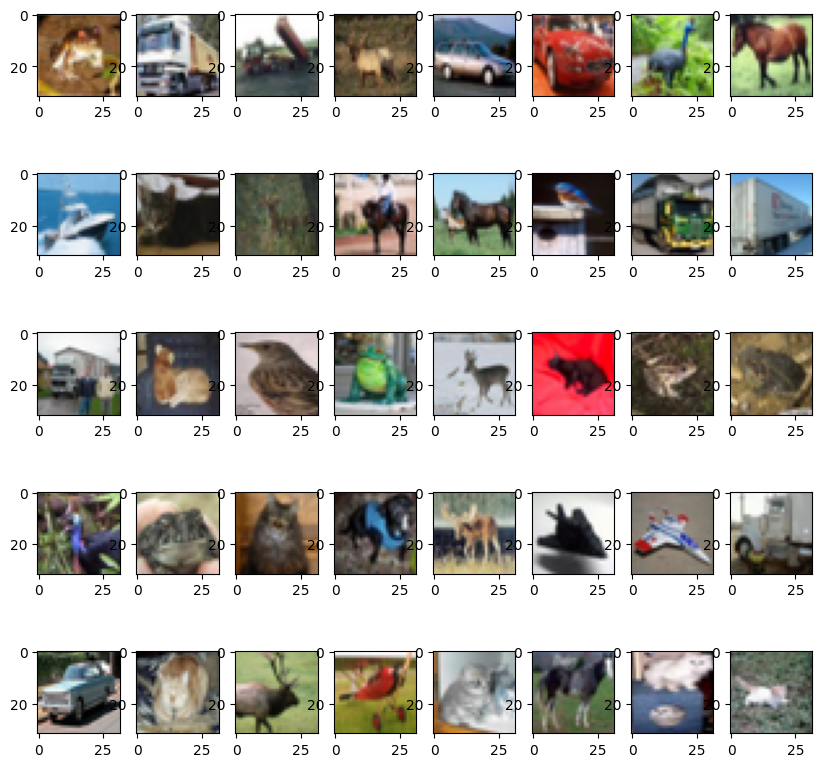

In [3]:
from PIL import Image
pyplot.figure(figsize=(10,10))
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    pyplot.subplot(5, 8, i + 1)
    pyplot.imshow(im)
pyplot.show()

MNISTの手書き数字よりピクセル数は若干増えただけですが、カラー画像なので３倍程度のデータ量があります。大きなデータで学習させるには、より多くのコンピューター資源と処理時間が必要となります。

前回のような単純なニューラルネットワークでは、今回の画像分類のような問題を解こうとしても十分な性能が出ません。

CNNを用いて学習するには時間がかかりますが、より高い性能を得ることができます。

# 画像分類用の畳み込みニューラルネットワークを構築する
画像分類を行うために、畳み込みニューラルネットワーク(CNN)を作ります。前回の演習で作成したものよりも中間層（隠れ層）の多い、複雑なニューラルネットワークになっています。

In [4]:
num_classes = len(labels)
in_shape = (32, 32, 3)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=in_shape),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512),
  tf.keras.layers.Activation('relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(num_classes),
  tf.keras.layers.Activation('softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 訓練用データで学習する
訓練用のデータを使って、構築したCNNで画像を学習させます。

前回のニューラルネットワークより複雑なため、学習時間もより多くかかります。気長に待ってください。

In [5]:
fit = model.fit(x_train, y_train,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.3058 - loss: 1.8695 - val_accuracy: 0.5709 - val_loss: 1.1940
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5627 - loss: 1.2133 - val_accuracy: 0.6600 - val_loss: 0.9649
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6447 - loss: 0.9995 - val_accuracy: 0.6992 - val_loss: 0.8615
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6892 - loss: 0.8860 - val_accuracy: 0.7108 - val_loss: 0.8226
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7139 - loss: 0.8094 - val_accuracy: 0.7339 - val_loss: 0.7625
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7433 - loss: 0.7353 - val_accuracy: 0.7523 - val_loss: 0.7183
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7626 - loss: 0.6758 - val_accuracy: 0.7603 - val_loss: 0.6991
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7786 - loss: 0.6306 -

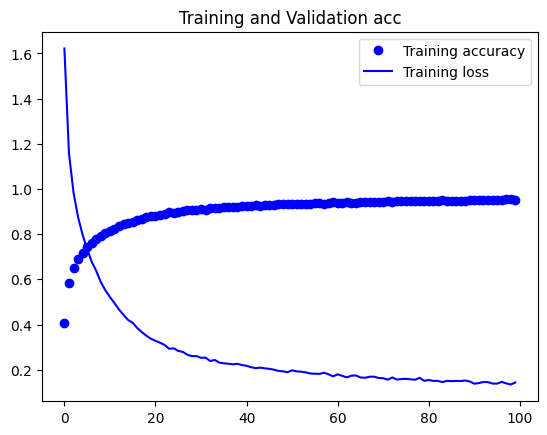

<Figure size 640x480 with 0 Axes>

In [6]:
acc = fit.history['accuracy']
loss = fit.history['loss']
epochs = range(len(acc))
pyplot.plot(epochs, acc, 'bo' ,label = 'Training accuracy')
pyplot.plot(epochs, loss, 'b' , label= 'Training loss')
pyplot.title('Training and Validation acc')
pyplot.legend()
pyplot.figure()
pyplot.show()

## モデルの検証
訓練用データでは用いていない、未知のテスト用データを使って学習状況を確認します。

正確性は accuracy で確認できます。0.8036 であれば約80%の正確さだといえます。

In [7]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.8044 - loss: 0.8657


[0.8657321333885193, 0.8044000267982483]

## テスト用データの画像分類結果を確認する
テスト用の画像を表示し、それぞれ何に分類されたかを表示させます。

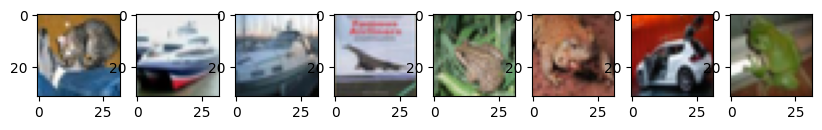

['猫', '船', '船', '飛行機', 'カエル', 'カエル', '自動車', '鹿']


In [8]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
tests = x_test[:8]
pyplot.figure(figsize=(10,10))
for i in range(0, len(tests)):
    pyplot.subplot(1, len(tests), i + 1)
    pyplot.imshow(tests[i], cmap='gray')
pyplot.show()
#tests = tests.reshape(tests.shape[0], 28, 28, 1).astype('float32')
r = probability_model(tests)
result = []
for i in np.argmax(r.numpy(), axis=1):
    result.append(labels[i])
print(result)

上段に表示されているのがテスト用データの画像です。

下段に表示されているのが、画像分類によって導かれた「画像が表すモノの名前」です。

おおむね正しく分類できていることが確認できるでしょう。

# 演習：実際に撮影した画像で試してみよう

実際に、カメラなどで撮影した画像を用いて、画像分類がうまくできているか確かめてみましょう。

CIFAR10で分類できるのは、飛行機、自動車、鳥、猫、鹿、犬、カエル、馬、船、トラックのいずれかの画像です。

スマホで撮影するか、ネットにある写真などを使って画像ファイルを用意してください。

あまりサイズの大きいファイルだとアップロードに時間がかかるので、適当に縮小したりトリミングしましょう。

例として筆者の飼い猫の写真（1024x1024ピクセル）を示します。この画像をダウンロードして使ってみても構いません。


## 画像ファイルをアップロードする
次のセルを実行すると、ファイルをアップロードするボタンが現れます。ボタンを押したら、作成した画像ファイルを指定してアップロードしてください。

In [9]:
from google.colab import files
r = files.upload()
if len(r) == 0:
    print("ファイルをアップロードできませんでした")
else:
    filename = list(r.keys())[0]
    img = cv2.imread(filename)
    import os
    os.remove(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(32,32))
    pyplot.imshow(img)
    pyplot.axis("off")
    pyplot.show()

KeyboardInterrupt: 

アップロードした画像を、縦横32x32ピクセルに縮小したものが表示されます。

## 画像ファイルを分類させる
読み込んだ画像を分類させるには次のセルを実行します。セルを実行すると、「この画像はxxxです」のように表示されます。

In [ ]:
img = img.reshape(1, 32, 32, 3)
ans = probability_model([img])
print(ans)
print("この画像は" +  labels[int(np.argmax(ans, axis=1))] + "です")

１０種類の画像をいろいろ試してみて、画像を正しく言い当てられるか確認してください。

どのような分類の結果についてどのような傾向があるか考えたり、このモデルの得意・不得意を言葉で表現してみてください。

# 参考文献
この実験演習のプログラムは、杉山陽一他著「PythonによるAI・機械学習・深層学習アプリのつくり方」ISBN978-4-8026-1164-0 を参考にしています。